# EDA Processed Data - Basic

NILM

Javier Monreal Tolmo. GFT Spain

September 2024 - October 2024

## Setup

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path

from nilm import logger

log = logger.init(level="DEBUG", save_log=False)
log.debug(" ---- EDA Processed Data ----")


ModuleNotFoundError: No module named 'nilm'

## Load NILMTK Data

In [ ]:

import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet('random.h5')
elec = ds.buildings[1].elec

print(elec)
plt.plot(elec[1].power_series_all_data())

# Load HIPE Data

In [7]:
data_path = "../data"

from nilm.load_utils.load_data import unzip_files

zip_file = "hipe_cleaned_v1.0.1_geq_2017-10-01_lt_2018-01-01_features_v1.0.0_only-on_1hour-agg.zip"

unzip_files(data_path, zip_file, output_path = data_path / Path(zip_file.split('.')[0]))

In [8]:
from nilm.load_utils.load_data import get_file_names

folder_path = Path(data_path) / "hipe_cleaned_v1"

file_names = get_file_names(folder_path, format="csv")

print(len(file_names))


11


In [37]:
data_appliances = {}

for csv_file in file_names[:]:

    file_name = str(csv_file).split("/")[-1].split("_geq")[0]
    data_appliances[file_name]  = pd.read_csv(csv_file, decimal=".", low_memory=False, parse_dates=["id"], index_col="id")


In [38]:
data_appliances.keys()

dict_keys(['VacuumOven_PhaseCount_3', 'ChipPress_PhaseCount_3', 'ScreenPrinter_PhaseCount_2', 'WashingMachine_PhaseCount_3', 'VacuumPump1_PhaseCount_3', 'PickAndPlaceUnit_PhaseCount_2', 'SolderingOven_PhaseCount_3', 'VacuumPump2_PhaseCount_2', 'HighTemperatureOven_PhaseCount_3', 'ChipSaw_PhaseCount_3', 'MainTerminal_PhaseCount_3'])

In [33]:
data_appliances[file_name].shape

(139, 254)

In [28]:
import plotly.express as px

In [36]:
data_appliances['VacuumOven_PhaseCount_3'].index

RangeIndex(start=0, stop=139, step=1)

In [29]:
len(data_appliances['VacuumOven_PhaseCount_3'].index)

139

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
# heatmap all variables
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
corr_matrix = df_all.reset_index(drop=True).corr(numeric_only=True)
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

In [ ]:
# Generate pandas profile report
# df_all_profile = df_all.set_index("kiln", append=True, drop=False).copy()
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_all, title="Processed Combined Data", explorative=False)
# output_file="../reports/eda_processed.html"
# # create parent directory if it does not exist
# Path(output_file).parent.mkdir(parents=True, exist_ok=True)
# profile.to_file(output_file=output_file)

# Converted Data

In [5]:
from pathlib import Path

In [6]:
DATA_PATH = '../../data/'

In [39]:

import h5py
f = h5py.File(Path(DATA_PATH) / 'hipe_15min.h5','r')
for item in f.keys():
    print(item)

building1


## HDFStore

In [40]:
from pandas import HDFStore

hdf_hipe = HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', mode="r")
hdf_hipe.keys()
#data = hdf.get(‘/key1’)

['/building1/elec/meter1',
 '/building1/elec/meter10',
 '/building1/elec/meter11',
 '/building1/elec/meter2',
 '/building1/elec/meter3',
 '/building1/elec/meter4',
 '/building1/elec/meter5',
 '/building1/elec/meter6',
 '/building1/elec/meter7',
 '/building1/elec/meter8',
 '/building1/elec/meter9']

In [41]:
hdf_hipe.get('/building1/elec/meter1')

physical_quantity,power
type,apparent
,
2017-10-01 00:00:00+02:00,6685.333285
2017-10-01 00:15:00+02:00,6525.792667
2017-10-01 00:30:00+02:00,6502.073204
2017-10-01 00:45:00+02:00,7280.914612
2017-10-01 01:00:00+02:00,6667.804850
...,...
2017-12-31 22:45:00+01:00,6064.024355
2017-12-31 23:00:00+01:00,8979.634153


#### Metadata

In [133]:
key = '/building1/'
with HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', "r") as data_store:
    node = data_store.get_node(key)
    print(node._v_attrs.metadata['appliances'])

[{'original_name': 'chip_press', 'type': 'motor', 'instance': 1, 'meters': [2]}, {'original_name': 'chip_saw', 'type': 'motor', 'instance': 2, 'meters': [3]}, {'original_name': 'high_temperature_oven', 'type': 'oven', 'instance': 1, 'meters': [4]}, {'original_name': 'pick_and_place_unit', 'type': 'motor', 'instance': 3, 'meters': [5]}, {'original_name': 'screen_printer', 'type': 'printer', 'instance': 1, 'meters': [6]}, {'original_name': 'soldering_oven', 'type': 'oven', 'instance': 2, 'meters': [7]}, {'original_name': 'vacuum_oven', 'type': 'oven', 'instance': 3, 'meters': [8]}, {'original_name': 'vacuum_pump', 'type': 'motor', 'instance': 4, 'meters': [9]}, {'original_name': 'vacuum_pump', 'type': 'motor', 'instance': 5, 'meters': [10]}, {'original_name': 'washing_machine', 'type': 'washing machine', 'instance': 1, 'meters': [11]}]


#### Data

In [43]:
### Load Dataframe
with HDFStore(Path(DATA_PATH) / 'hipe_15min.h5', "r") as data_store:

    df = data_store.get('/building1/elec/meter1')
    print(df.columns)

MultiIndex([('power', 'apparent')],
           names=['physical_quantity', 'type'])


In [44]:
from tabulate import tabulate
power_df = df['power']
print(tabulate(power_df.head(), headers='keys', tablefmt='psql'))

+---------------------------+------------+
|                           |   apparent |
|---------------------------+------------|
| 2017-10-01 00:00:00+02:00 |    6685.33 |
| 2017-10-01 00:15:00+02:00 |    6525.79 |
| 2017-10-01 00:30:00+02:00 |    6502.07 |
| 2017-10-01 00:45:00+02:00 |    7280.91 |
| 2017-10-01 01:00:00+02:00 |    6667.8  |
+---------------------------+------------+


## Dataset

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px


In [8]:
from nilmtk.dataset import DataSet

hipe = DataSet(str(Path(DATA_PATH) / 'hipe_15min.h5'))

In [11]:
elec = hipe.buildings[1].elec

In [12]:
mains_meter = elec.mains()

In [13]:
mains = next(mains_meter.load())

In [12]:
mains

physical_quantity,power
type,apparent
,
2017-10-01 00:00:00+02:00,6685.333285
2017-10-01 00:15:00+02:00,6525.792667
2017-10-01 00:30:00+02:00,6502.073204
2017-10-01 00:45:00+02:00,7280.914612
2017-10-01 01:00:00+02:00,6667.804850
...,...
2017-12-31 22:45:00+01:00,6064.024355
2017-12-31 23:00:00+01:00,8979.634153


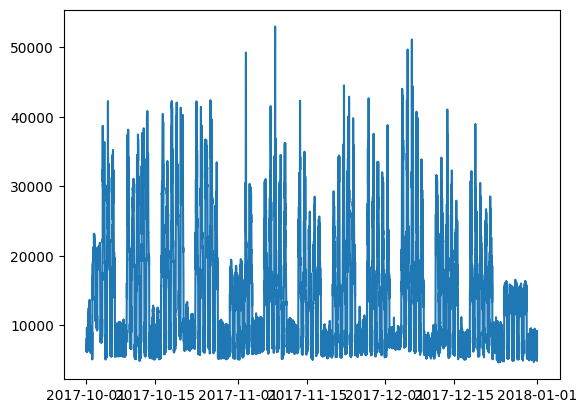

In [10]:
plt.plot(mains.index, mains[('power', 'apparent')])

In [ ]:
px.scatter(mains, x=mains.index, y=mains[('power', 'apparent')].values).update_traces(mode="lines+markers")

In [14]:
df_chip_press = next(appliance_meters.meters[0].load())
plt.plot(df_chip_press.index, df_chip_press[('power', 'active')])

NameError: name 'appliance_meters' is not defined

In [49]:
mains.max()

physical_quantity  type    
power              apparent    53004.355823
dtype: float64

In [15]:
appliance_meters = elec.meters_directly_downstream_of_mains()

In [16]:
appliance_meters.__dict__

{'meters': [ElecMeter(instance=2, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=1)]),
  ElecMeter(instance=3, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=2)]),
  ElecMeter(instance=4, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=1)]),
  ElecMeter(instance=5, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=3)]),
  ElecMeter(instance=6, building=1, dataset='HIPE', appliances=[Appliance(type='printer', instance=1)]),
  ElecMeter(instance=7, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=2)]),
  ElecMeter(instance=8, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=3)]),
  ElecMeter(instance=9, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=4)]),
  ElecMeter(instance=10, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=5)]),
  ElecMeter(instance=11, building=1, dataset='HIPE', appliances

### Chip Press (Motor 1)

In [18]:
appliance_meters.meters[0].name

'Chip Press'

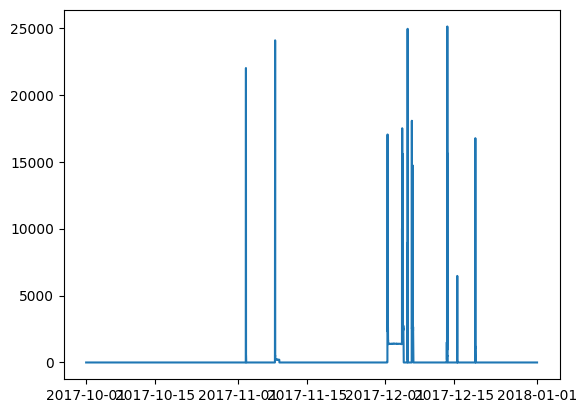

In [19]:
df_chip_press = next(appliance_meters.meters[0].load())
plt.plot(df_chip_press.index, df_chip_press[('power', 'active')])

In [ ]:
px.scatter(df_chip_press, x=df_chip_press.index, y=df_chip_press[('power', 'active')].values).update_traces(mode="lines+markers")

#### Missing values

In [21]:
import pandas as pd

pd.date_range(start=pd.to_datetime('2017-11-02  13:00:00').tz_localize('Europe/Berlin'), end = pd.to_datetime('2017-12-19 10:45:00').tz_localize('Europe/Berlin'), freq='15min').difference(df_chip_press.index)


DatetimeIndex([], dtype='datetime64[ns, Europe/Berlin]', freq='15min')

In [58]:
print(f"Min: {df_chip_press.values.min()} \n Max: {df_chip_press.values.max()}")

Min: 0.0 
 Max: 25110.552076913093


In [122]:
df_chip_press[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00      0.000000
2017-12-04 18:30:00+01:00      5.521472
2017-12-19 09:15:00+01:00     14.242424
2017-12-01 09:45:00+01:00     25.060975
2017-12-05 15:00:00+01:00     49.451220
2017-12-13 13:30:00+01:00     55.304877
2017-12-01 10:45:00+01:00     58.048780
2017-12-01 10:00:00+01:00     59.999999
2017-11-09 09:15:00+01:00     92.173914
2017-12-13 17:45:00+01:00    153.475610
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Chip Press')

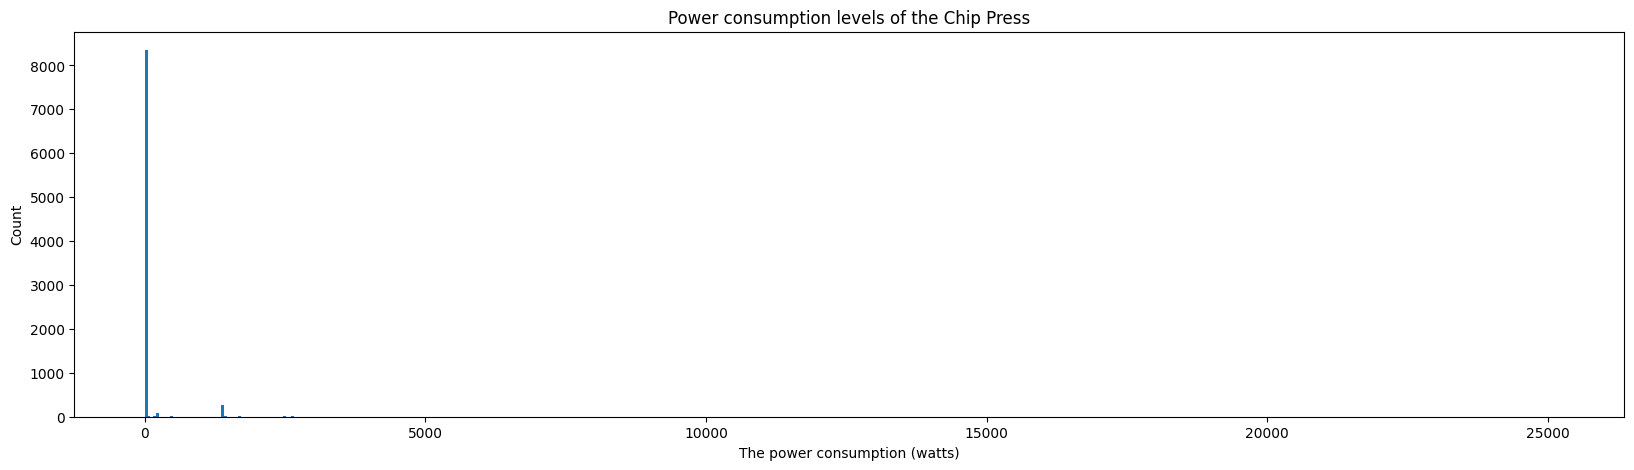

In [59]:
figure(figsize=(20,5))
_ = plt.hist(df_chip_press[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Chip Press')

#### Chip Saw (Motor 2)

In [17]:
appliance_meters.meters[1].name

'Chip Saw'

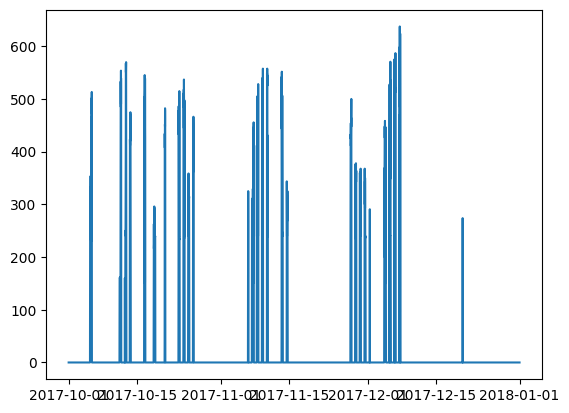

In [18]:
df_chip_saw = next(appliance_meters.meters[1].load())
plt.plot(df_chip_saw.index, df_chip_saw[('power', 'active')])

#### Missing values

In [ ]:
import pandas as pd

pd.date_range(start=pd.to_datetime('2017-11-02  13:00:00').tz_localize('Europe/Berlin'), end = pd.to_datetime('2017-12-19 10:45:00').tz_localize('Europe/Berlin'), freq='15min').difference(df_chip_press.index)


DatetimeIndex(['2017-11-02 15:00:00+01:00', '2017-11-02 15:15:00+01:00',
               '2017-11-02 15:30:00+01:00', '2017-11-02 15:45:00+01:00',
               '2017-11-02 16:00:00+01:00', '2017-11-02 16:15:00+01:00',
               '2017-11-02 16:30:00+01:00', '2017-11-02 16:45:00+01:00',
               '2017-11-02 17:00:00+01:00', '2017-11-02 17:15:00+01:00',
               ...
               '2017-12-19 06:45:00+01:00', '2017-12-19 07:00:00+01:00',
               '2017-12-19 07:15:00+01:00', '2017-12-19 07:30:00+01:00',
               '2017-12-19 07:45:00+01:00', '2017-12-19 08:00:00+01:00',
               '2017-12-19 08:15:00+01:00', '2017-12-19 08:30:00+01:00',
               '2017-12-19 08:45:00+01:00', '2017-12-19 09:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=4015, freq=None)

In [ ]:
px.scatter(df_chip_saw, x=df_chip_saw.index, y=df_chip_saw[('power', 'active')].values).update_traces(mode="lines+markers")

#### Missing values

In [65]:
import pandas as pd

pd.date_range(start=pd.to_datetime('2017-11-02  13:00:00').tz_localize('Europe/Berlin'), end = pd.to_datetime('2017-12-19 10:45:00').tz_localize('Europe/Berlin'), freq='15min').difference(df_chip_press.index)


DatetimeIndex([], dtype='datetime64[ns, Europe/Berlin]', freq='15min')

In [66]:
print(f"Min: {df_chip_saw.values.min()} \n Max: {df_chip_saw.values.max()}")

Min: 0.0 
 Max: 637.3619644851224


In [ ]:
df_chip_saw[('power','active')].drop_duplicates().nsmallest(10)

Text(0.5, 1.0, 'Power consumption levels of the Chip Saw')

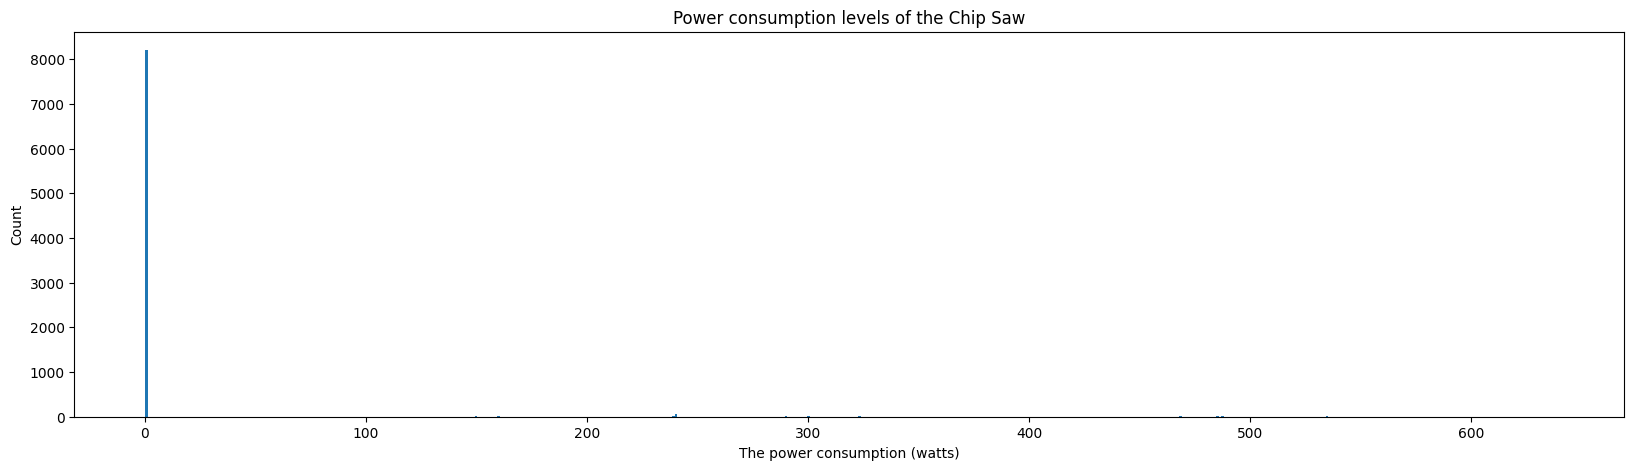

In [67]:
figure(figsize=(20,5))
_ = plt.hist(df_chip_saw[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Chip Saw')

#### High Temperature Oven (Oven 1)

In [68]:
appliance_meters.meters[2].name


'High Temperature Oven'

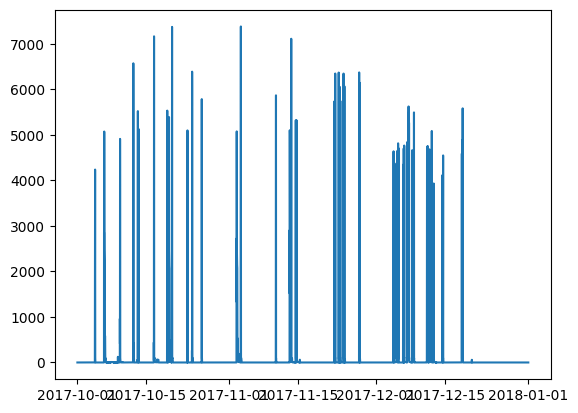

In [23]:
high_temperature_oven = next(appliance_meters.meters[2].load())
plt.plot(high_temperature_oven.index, high_temperature_oven[('power', 'active')])

In [ ]:
px.scatter(high_temperature_oven, x=high_temperature_oven.index, y=high_temperature_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [71]:
print(f"Min: {high_temperature_oven.values.min()} \n Max: {high_temperature_oven.values.max()}")

Min: 0.0 
 Max: 7379.202401711166


In [ ]:
high_temperature_oven[('power','active')].drop_duplicates().nsmallest(50)

Text(0.5, 1.0, 'Power consumption levels of the High Temperature Oven')

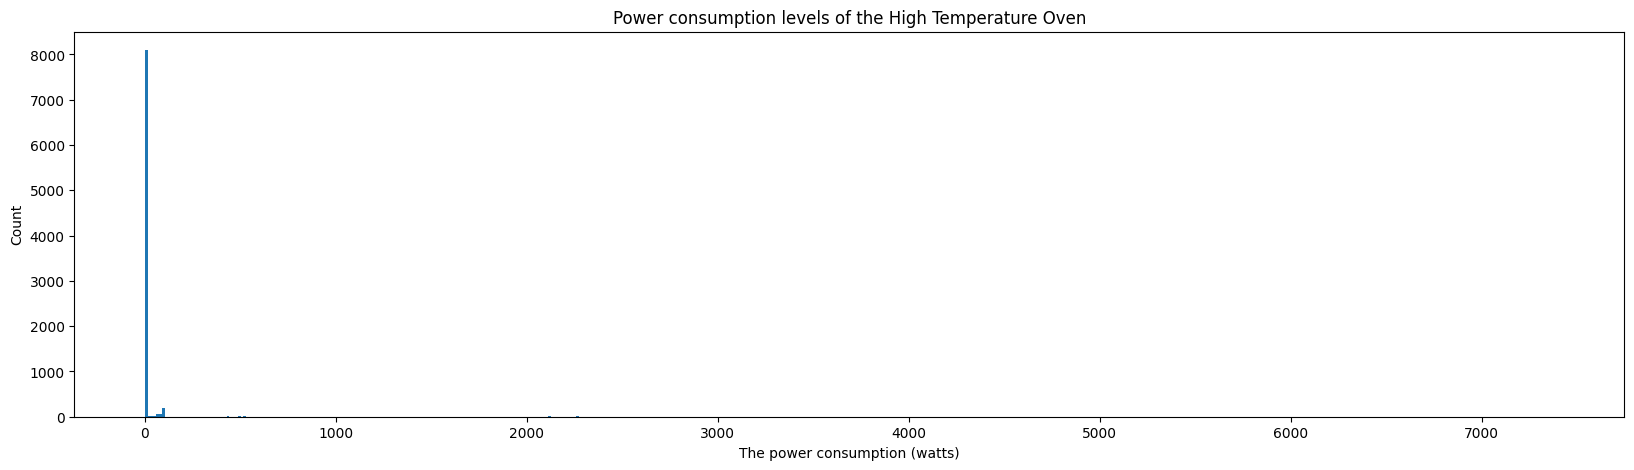

In [72]:
figure(figsize=(20,5))
_ = plt.hist(high_temperature_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the High Temperature Oven')

#### Pick And Place Unit (Motor 3)

In [20]:
appliance_meters.meters[3].name


'Pick And Place Unit'

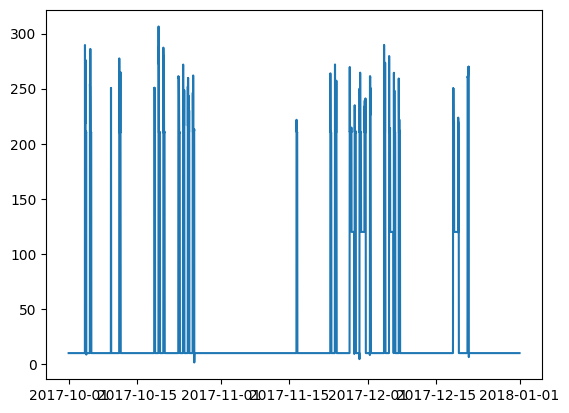

In [21]:
pick_and_place_unit = next(appliance_meters.meters[3].load())
plt.plot(pick_and_place_unit.index, pick_and_place_unit[('power', 'active')])

In [ ]:
px.scatter(pick_and_place_unit, x=pick_and_place_unit.index, y=pick_and_place_unit[('power', 'active')].values).update_traces(mode="lines+markers")

In [131]:
print(f"Min: {pick_and_place_unit.values.min()} \n Max: {pick_and_place_unit.values.max()}")

Min: 1.4917126738399 
 Max: 306.4444477359453


In [132]:
pick_and_place_unit[('power','active')].drop_duplicates().nsmallest(10)


2017-10-26 15:30:00+02:00     1.491713
2017-11-29 07:30:00+01:00     4.535519
2017-12-21 15:15:00+01:00     6.393443
2017-12-01 10:30:00+01:00     8.241758
2017-10-04 14:30:00+02:00     8.681318
2017-11-28 06:00:00+01:00     9.285714
2017-10-01 00:00:00+02:00    10.000000
2017-12-07 07:45:00+01:00    12.404372
2017-12-06 06:00:00+01:00    15.573770
2017-10-05 14:45:00+02:00    23.867403
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Pick And Place Unit')

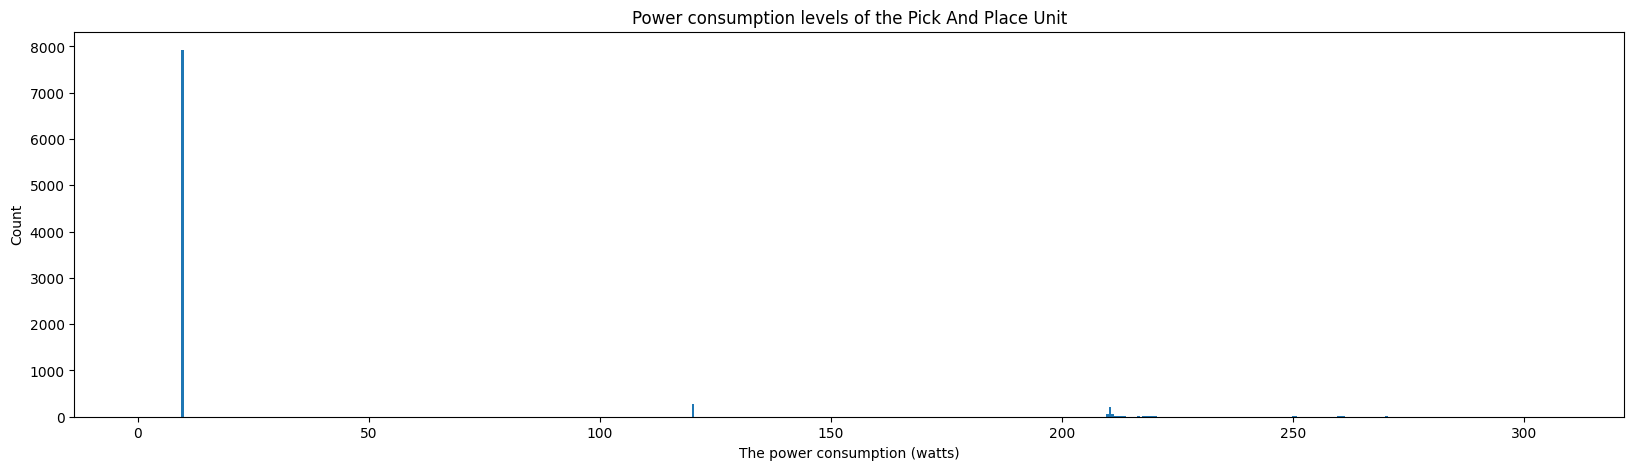

In [77]:
figure(figsize=(20,5))
_ = plt.hist(pick_and_place_unit[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Pick And Place Unit')

#### Screen Printer

In [25]:
appliance_meters.meters[4].name

'Screen Printer'

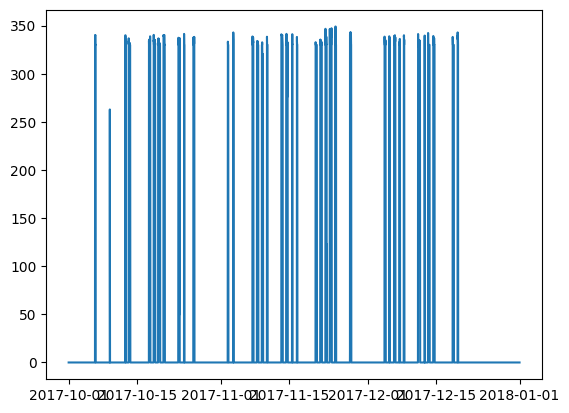

In [26]:
screen_printer = next(appliance_meters.meters[4].load())
plt.plot(screen_printer.index, screen_printer[('power', 'active')])

In [ ]:
px.scatter(screen_printer, x=screen_printer.index, y=screen_printer[('power', 'active')].values).update_traces(mode="lines+markers")

In [81]:
print(f"Min: {screen_printer.values.min()} \n Max: {screen_printer.values.max()}")

Min: 0.0 
 Max: 349.1208818587628


In [ ]:
screen_printer[('power','active')].drop_duplicates().nsmallest(10)

Text(0.5, 1.0, 'Power consumption levels of the Screen Printer')

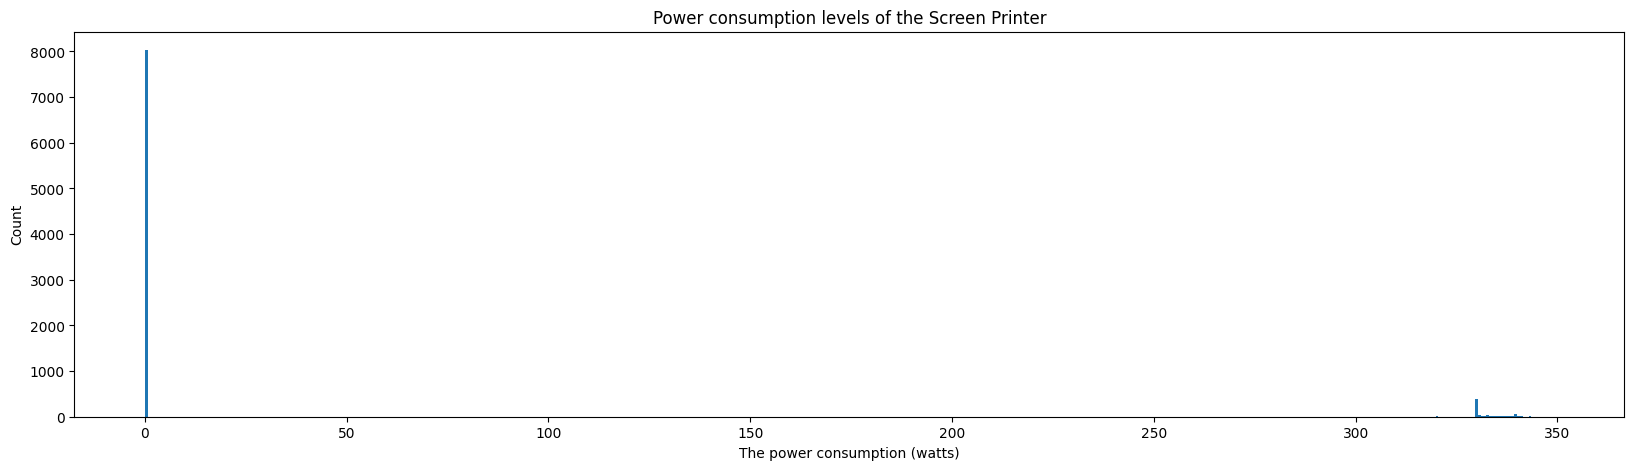

In [82]:
figure(figsize=(20,5))
_ = plt.hist(screen_printer[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Screen Printer')

#### Soldering Oven (Oven 2)

In [17]:
appliance_meters.meters[5].name

'Soldering Oven'

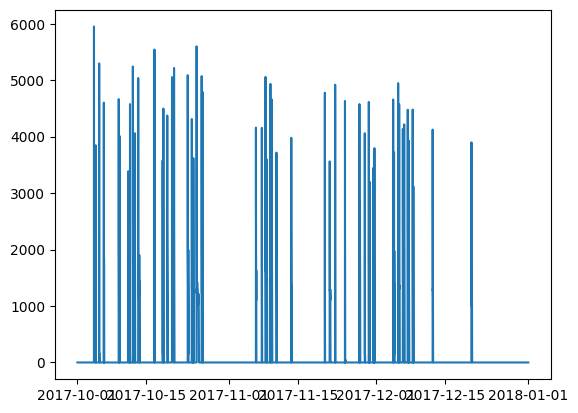

In [18]:
soldier_oven = next(appliance_meters.meters[5].load())
plt.plot(soldier_oven.index, soldier_oven[('power', 'active')])

In [ ]:
px.scatter(soldier_oven, x=soldier_oven.index, y=soldier_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [86]:
print(f"Min: {soldier_oven.values.min()} \n Max: {soldier_oven.values.max()}")

Min: 0.0 
 Max: 5950.73619294066


In [137]:
soldier_oven[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00     0.000000
2017-11-06 16:30:00+01:00     0.365854
2017-11-21 14:45:00+01:00     3.658537
2017-12-06 14:00:00+01:00     4.601227
2017-10-05 13:15:00+02:00     6.341464
2017-10-24 10:15:00+02:00    11.042945
2017-11-24 15:00:00+01:00    14.634147
2017-12-07 10:15:00+01:00    23.926381
2017-10-06 10:00:00+02:00    32.865854
2017-12-12 13:30:00+01:00    37.500001
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Soldering Oven')

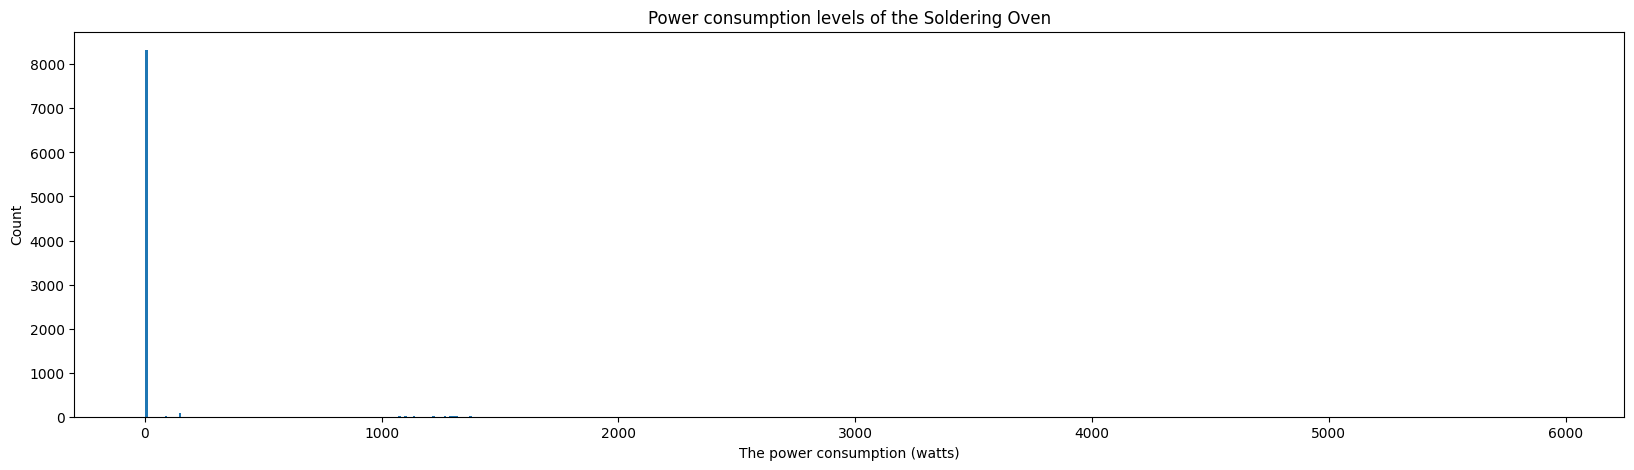

In [87]:
figure(figsize=(20,5))
_ = plt.hist(soldier_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Soldering Oven')

#### Vacuum Oven (Oven 3)

In [88]:
appliance_meters.meters[6].name

'Vacuum Oven'

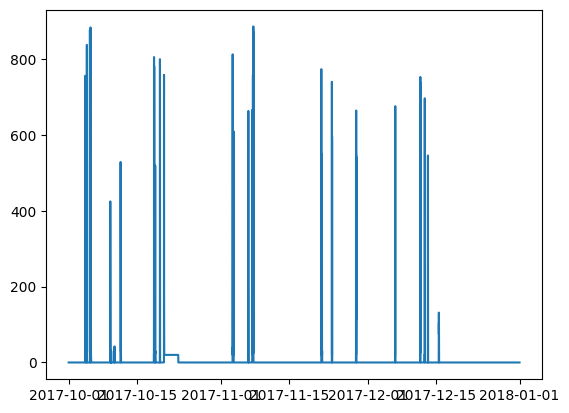

In [89]:
vacuum_oven = next(appliance_meters.meters[6].load())
plt.plot(vacuum_oven.index, vacuum_oven[('power', 'active')])

In [ ]:
px.scatter(vacuum_oven, x=vacuum_oven.index, y=vacuum_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [91]:
print(f"Min: {vacuum_oven.values.min()} \n Max: {vacuum_oven.values.max()}")

Min: 0.0 
 Max: 886.0248492232391


In [139]:
vacuum_oven[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00    0.000000
2017-12-21 10:15:00+01:00    0.060976
2017-10-20 11:00:00+02:00    0.245399
2017-11-07 10:00:00+01:00    0.368098
2017-10-19 15:45:00+02:00    1.717791
2017-11-06 15:45:00+01:00    1.840491
2017-10-18 12:30:00+02:00    3.475610
2017-10-05 11:00:00+02:00    3.619632
2017-12-15 13:15:00+01:00    3.902439
2017-10-04 11:30:00+02:00    4.146341
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Vacuum Oven')

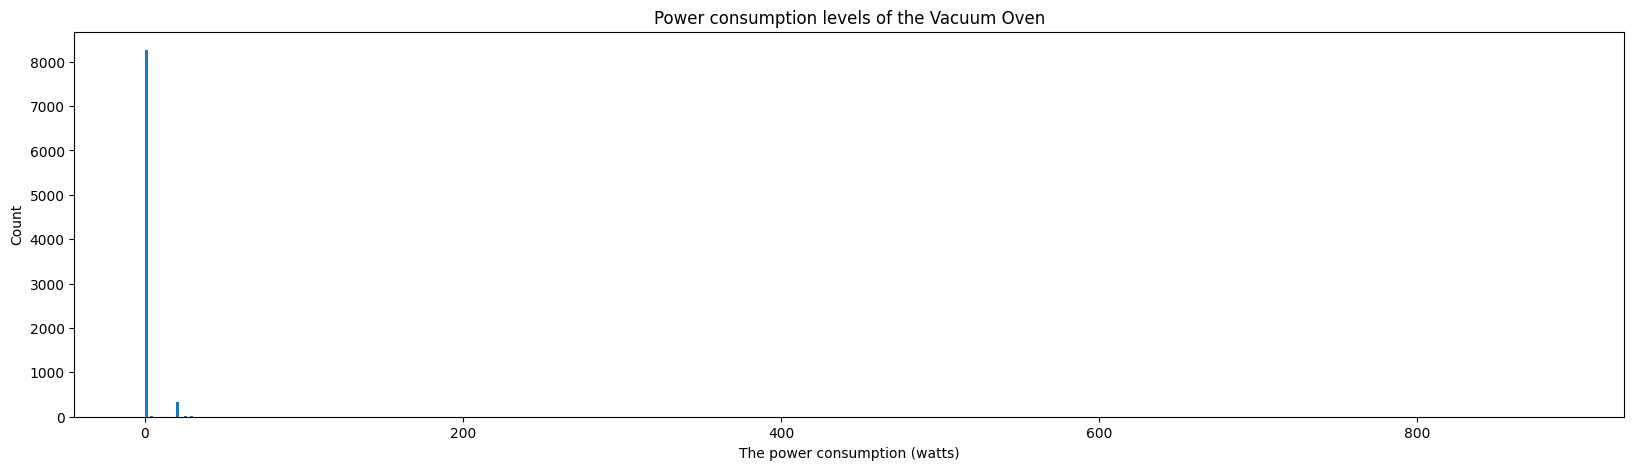

In [92]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Oven')

#### Vacuum Pump 1 (Motor 4)

In [20]:
appliance_meters.meters[7].name

'Vacuum Pump'

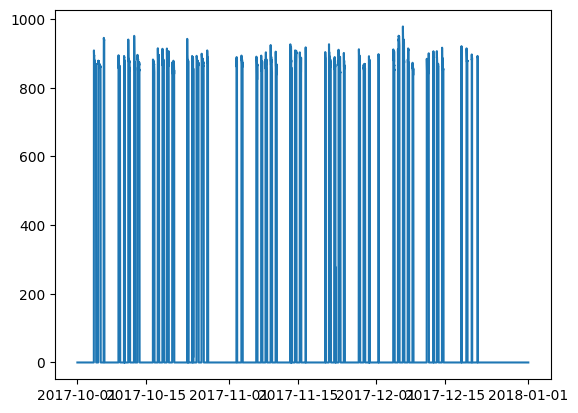

In [21]:
vacuum_pump_1 = next(appliance_meters.meters[7].load())
plt.plot(vacuum_pump_1.index, vacuum_pump_1[('power', 'active')])

In [ ]:
px.scatter(vacuum_pump_1, x=vacuum_pump_1.index, y=vacuum_pump_1[('power', 'active')].values).update_traces(mode="lines+markers")

In [141]:
print(f"Min: {vacuum_pump_1.values.min()} \n Max: {vacuum_pump_1.values.max()}")

Min: 0.0 
 Max: 978.4662639093727


In [ ]:
vacuum_pump_1[('power','active')].drop_duplicates().nsmallest(10)

Text(0.5, 1.0, 'Power consumption levels of the Vacuum Pump 1')

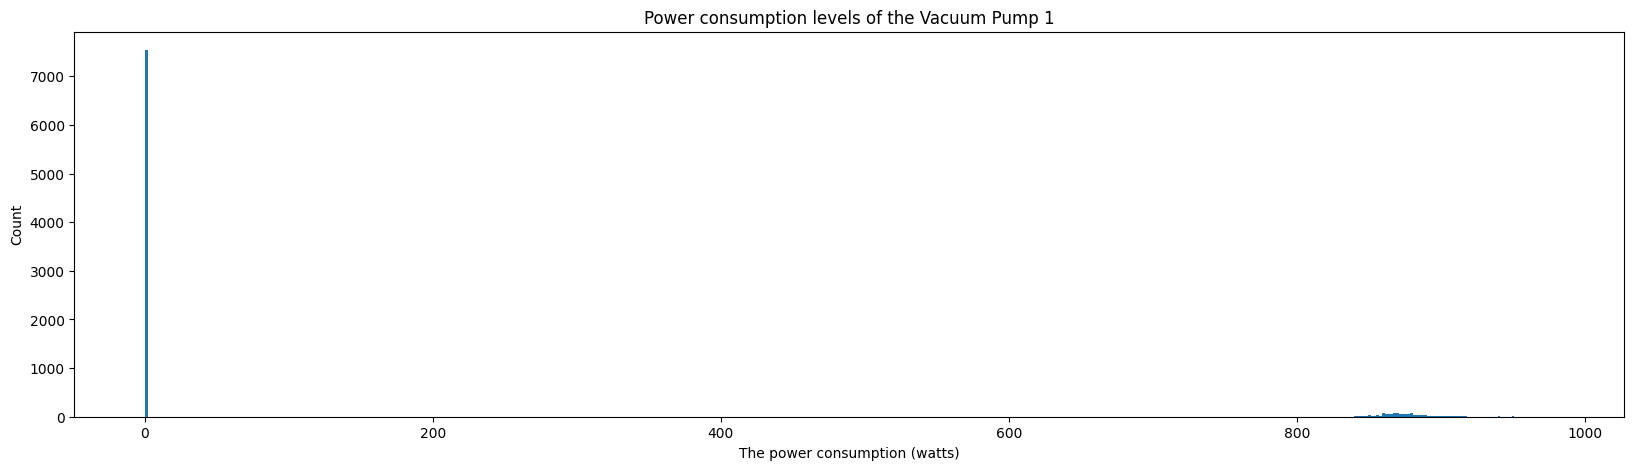

In [98]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_pump_1[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Pump 1')

#### Vacuum Pump 2 (Motor 5)

In [99]:
appliance_meters.meters[8].name

'Vacuum Pump'

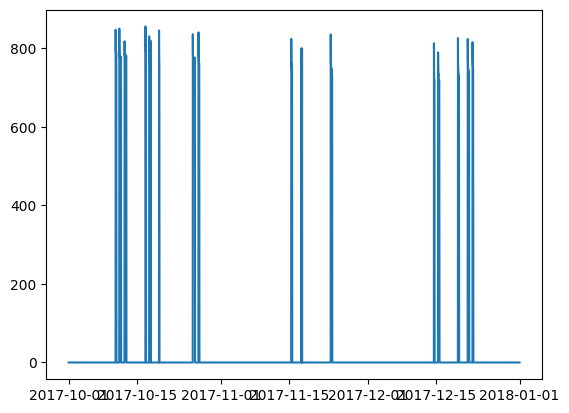

In [144]:
vacuum_pump_2 = next(appliance_meters.meters[8].load())
plt.plot(vacuum_pump_2.index, vacuum_pump_2[('power', 'active')])

In [ ]:
px.scatter(vacuum_pump_2, x=vacuum_pump_2.index, y=vacuum_pump_2[('power', 'active')].values).update_traces(mode="lines+markers")

In [143]:
print(f"Min: {vacuum_pump_2.values.min()} \n Max: {vacuum_pump_2.values.max()}")

Min: 0.0 
 Max: 855.9876540560781


In [ ]:
vacuum_pump_2[('power','active')].drop_duplicates().nsmallest(10)

Text(0.5, 1.0, 'Power consumption levels of the Vacuum Pump 2')

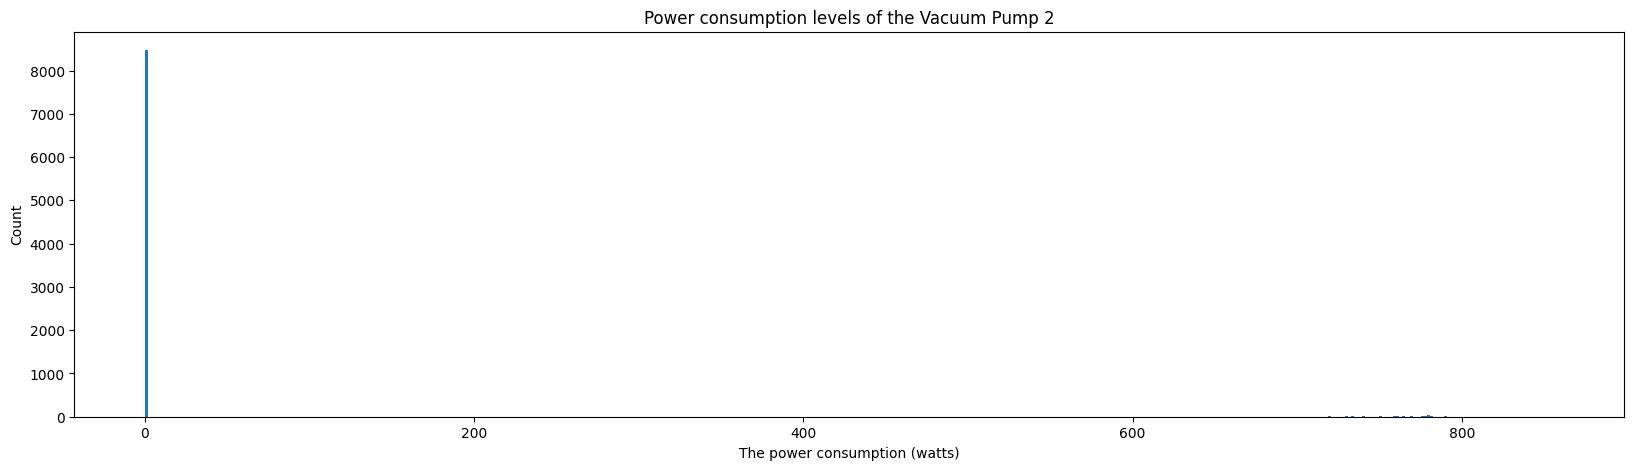

In [102]:
figure(figsize=(20,5))
_ = plt.hist(vacuum_pump_2[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Vacuum Pump 2')

#### Washing Machine

In [103]:
appliance_meters.meters[9].name

'Washing Machine'

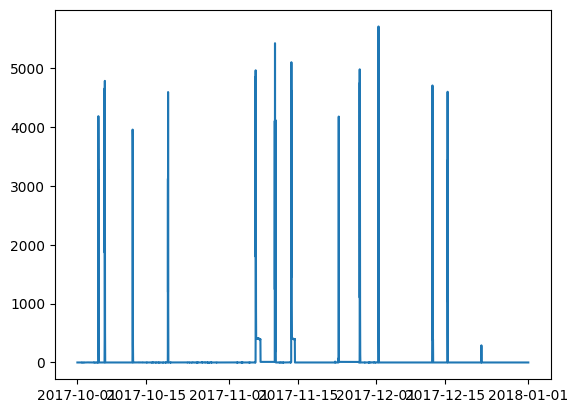

In [28]:
washing_machine = next(appliance_meters.meters[9].load())
plt.plot(washing_machine.index, washing_machine[('power', 'active')])

In [ ]:
px.scatter(washing_machine, x=washing_machine.index, y=washing_machine[('power', 'active')].values).update_traces(mode="lines+markers")

In [106]:
print(f"Min: {washing_machine.values.min()} \n Max: {washing_machine.values.max()}")

Min: 0.0 
 Max: 5710.740730281414


In [148]:
washing_machine[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:15:00+02:00    0.000000
2017-11-11 15:15:00+01:00    0.060241
2017-10-01 00:00:00+02:00    0.060606
2017-10-01 01:30:00+02:00    0.060976
2017-10-02 00:00:00+02:00    0.061350
2017-10-05 11:15:00+02:00    0.061728
2017-10-12 12:45:00+02:00    0.062112
2017-10-16 01:00:00+02:00    0.063694
2017-11-12 09:15:00+01:00    0.120482
2017-10-03 21:00:00+02:00    0.121212
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Washing Machine')

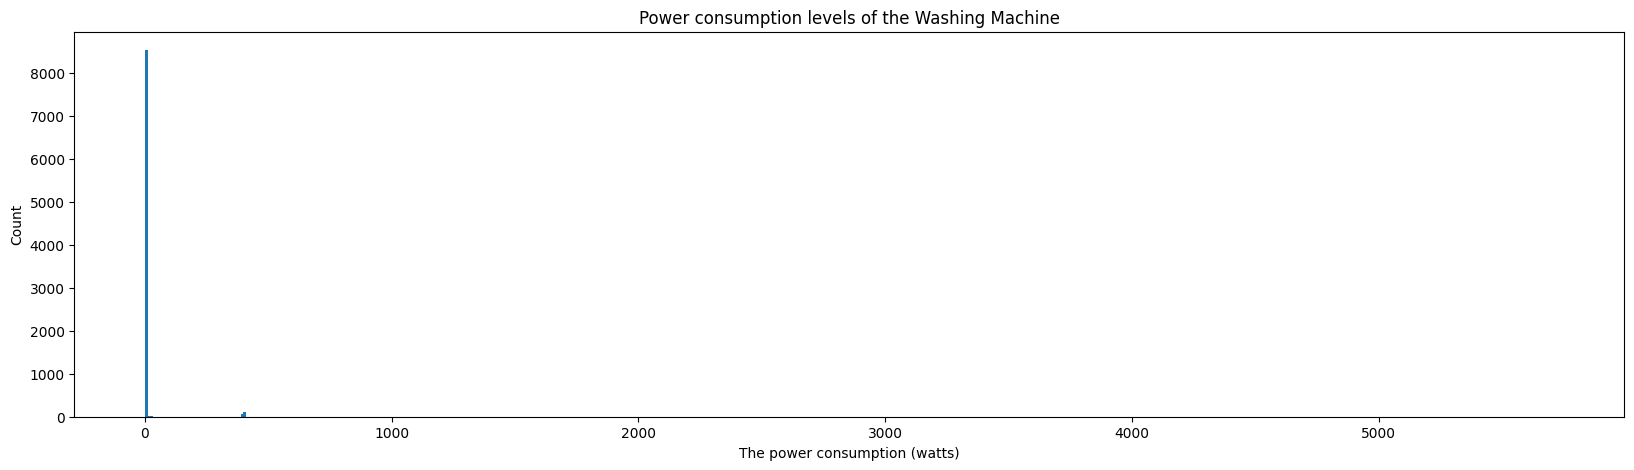

In [107]:
figure(figsize=(20,5))
_ = plt.hist(washing_machine[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Washing Machine')

In [20]:
hipe.set_window(start='2017-11-01',  end='2018-01-01')
df_wm = next(hipe.buildings[1].elec['washing machine'].load())
df_main = next(hipe.buildings[1].elec.mains().load())

**Checking the available measurements**

In [21]:
df_main.columns

MultiIndex([('power', 'apparent')],
           names=['physical_quantity', 'type'])

In [22]:
df_wm.columns

MultiIndex([('power', 'active')],
           names=['physical_quantity', 'type'])

**The rate of NaN values in the dataset**

In [26]:
df_wm.columns

MultiIndex([('power', 'active')],
           names=['physical_quantity', 'type'])

In [28]:
df_wm[('power', 'active')].isnull().mean()

np.float64(0.0)

In [ ]:
df_wm['active_power'].isnull().mean()

0.0

**The values distribution**

To check the distribution, we will not account for the 0's included in the dataset. We are also aware that the washing machine is big consumer and tehrefore we will filter small value that most probably noise related to measurement devices.